In [11]:
# We are going to be looking at traffic.csv which is a dataset regarding
# Las Vegas daily accident count. We will apply poisson regression with 
# the maximum likelihood approach using the gradient descent algorithm. 
# We will use basic python and libraries(numpy, pandas, scikit-learn and matplotlib)

In [1]:
# Reading in our libraries and data

import pandas as pd
import numpy as np

dataread = pd.read_csv('/Users/michaelguel/Desktop/ProjectData/traffic.csv')

dataread

,Crash_Date,Count,DayOfWeek,Holiday,Weather,Avg2days
0,1/1/2016,38,4,1,0,37.0
1,1/2/2016,22,5,0,0,36.0
2,1/3/2016,22,6,0,0,30.0
3,1/4/2016,47,0,0,1,22.0
4,1/5/2016,63,1,0,1,34.5
...,...,...,...,...,...,...
361,12/27/2016,33,1,0,0,25.5
362,12/28/2016,37,2,0,0,30.5
363,12/29/2016,41,3,0,0,35.0
364,12/30/2016,40,4,0,1,39.0


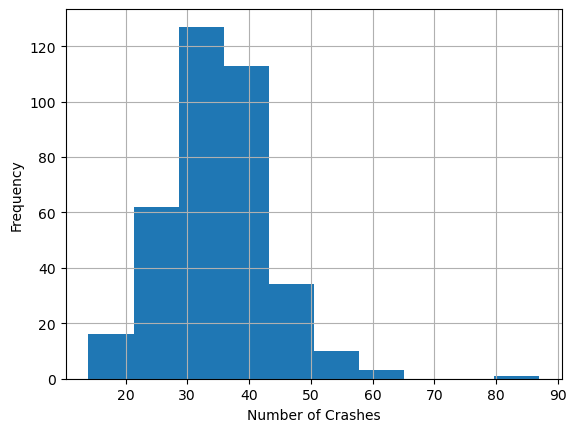

In [2]:
# Let's take a look at the count frequency

import matplotlib.pyplot as plt

plt.hist(dataread['Count'])
plt.xlabel('Number of Crashes')
plt.ylabel('Frequency')
plt.grid()

y = np.array(dataread['Count'])

In [3]:
# Looking at the data we can see that Avg2days will need to be standardized. Let's
# create the function.

def standardize(arr):
    result = arr.copy()
    m = arr.sum(axis=0)/arr.shape[0]
    s = np.sqrt(np.sum((arr - m)**2, axis=0)/(arr.shape[0]-1))
    return (result - m)/s

In [4]:
# Here we will call our function for the specified column and then seperate our predictor
# and target variables. We don't want crash_data so we will disclude. 

toarray = np.array(dataread.iloc[:,2:])

toarray[:,3] = standardize(toarray[:,3])

addone = np.ones(len(toarray[:,3]))

X = np.column_stack([toarray,addone])

X

array([[ 4.        ,  1.        ,  0.        ,  0.35028461,  1.        ],
       [ 5.        ,  0.        ,  0.        ,  0.19431847,  1.        ],
       [ 6.        ,  0.        ,  0.        , -0.74147838,  1.        ],
       ...,
       [ 3.        ,  0.        ,  0.        ,  0.03835233,  1.        ],
       [ 4.        ,  0.        ,  1.        ,  0.6622169 ,  1.        ],
       [ 5.        ,  0.        ,  1.        ,  0.89616611,  1.        ]])

In [5]:
# We will use scikit-learn to split our data into train and test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)

print('Training set: X.shape=', X_train.shape, ' y.shape=', y_train.shape)
print('Test set: X.shape=', X_test.shape, ' y.shape=', y_test.shape)

Training set: X.shape= (183, 5)  y.shape= (183,)
Test set: X.shape= (183, 5)  y.shape= (183,)


In [6]:
# Here we will define our poisson regression with parameters below. We will apply
# gradient descent to the NLL. We will plot the loss and also create a function
# to predict. 

class PoissonRegress:
        def fit(self, X, y, lr=0.001, maxiter=10000):
            n = len(y)
            w = np.zeros(X.shape[1])
            sumvec = np.ones(y.shape[0])
            loss = []
            for i in range(maxiter):
                w = w - lr/n * (X.T @ (np.exp(X@w) - y))
                loss.append(   (sumvec@(np.exp(X@w)) - (y.T@(X@w)))     )
            """
             Function inputs: (X,y,learning rate, maximum number of iterations)
             
             Gradient of negative log-likelihood: w(k) = w(k-1) - lr/N * gradient(NLL)
             
             N = number of training examples
             
             * Ignore log y!, it is independent of w
             
             Below we will plot the loss to ensure that we see convergence
            """ 
            self.weight = w
            iterations = list(range(len(loss)))
            plt.plot(iterations, loss)
            return w
        
        def predict(self, X):
            
            yhat = np.exp(X@self.weight)
            
            return yhat

Model parameters: [-0.03272236 -0.29337714  0.0897859   0.03751425  3.63482453]


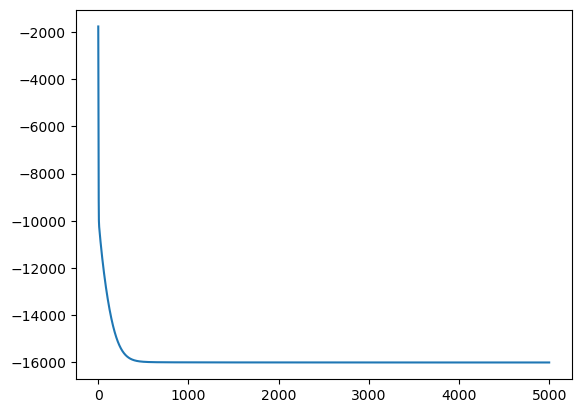

In [12]:
# Here we will call our class and fit the data, then plot the loss of our gradient
# descent. 

model = PoissonRegress()
param = model.fit(X_train, y_train, lr=1e-3, maxiter=5000)
print('Model parameters:', param)


Root mean squared error = 84.1754


Text(0, 0.5, 'Predicted value')

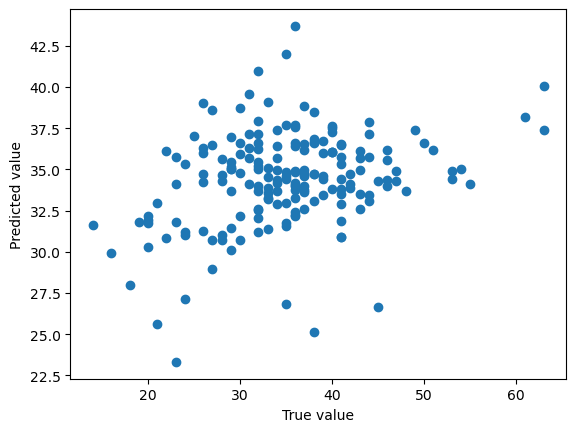

In [13]:
# Let's take a look at our models peformance

y_pred_test = model.predict(X_test)
print("Root mean squared error = %.4f" % (np.sum(np.sqrt((((y_test - y_pred_test)**2)/len(y_test))))))

plt.scatter(y_test,y_pred_test )  
plt.xlabel('True value')
plt.ylabel('Predicted value')

In [9]:
# Let's compare to the scikit learn package and see how similar they are

from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)
y_pred_train = reg.predict(X_train)

print('Model parameters:', list(reg.coef_))

Model parameters: [-1.138904044131804, -9.928778611861109, 3.2662670835017322, 1.3048632478680056, 0.0]


Root mean squared error = 83.8667


Text(0, 0.5, 'Predicted value')

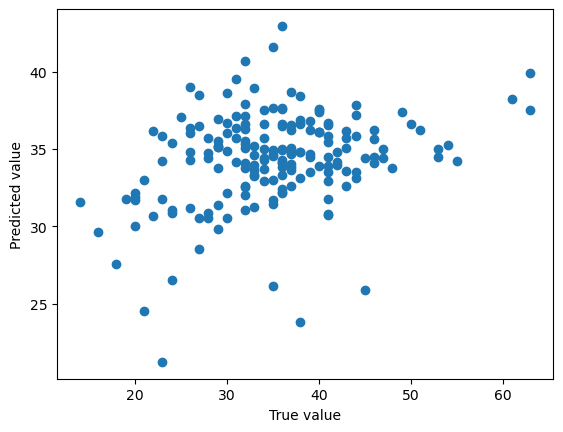

In [10]:
# We will look at the performance again and check the similarities

y_pred_test = reg.predict(X_test)
print("Root mean squared error = %.4f" % (np.sum(np.sqrt((((y_test - y_pred_test)**2)/len(y_test))))))

plt.scatter(y_test, y_pred_test)  
plt.xlabel('True value')
plt.ylabel('Predicted value')